In [17]:
# %load importData.py 
"""Contains function for importing and handling knockout RNAseq data"""
import pandas as pd

def importRNAseqKO():
    """Imports knockout RNAseq data, sets index to Gene Symbol, and removes knockouts without measurements"""
    data = pd.read_csv("data/rpmCounts_allRuns_matrix.tsv.xz", index_col="GeneSymbol", delim_whitespace=True)
    data = data.drop(["gene_id"], axis=1) # using GeneSymbol as index
    data = data.dropna(axis=1) # remove columns with no measurements

    # remove excess info from knockout names to make replicate names identical
    KO_genes = list(list(zip(*data.columns.str.split("-")))[0])
    data.columns = KO_genes
    return data

def formMatrix(data_in):
    """Takes in parameter of dataframe read in by importRNAseqKO() and forms matrix: rows = gene, columns = knockout model.
    There are 85 knockout models (including negative control) and 84 corresponding genes measured."""
    # average knockout replicate values and remove duplicate gene rows
    data_combined = data_in.groupby(by=data_in.columns, axis=1).mean() # knockout replicates
    data_combined = data_combined.groupby(["GeneSymbol"]).max() # duplicate genes

    # average negative controls into 1 value, drop WT (control = neg)
    data_combined['neg'] = data_combined[['neg01', 'neg10']].mean(axis=1)
    for i in range(1, 10):
        data_combined = data_combined.drop(["neg0"+str(i)], axis=1)
    data_combined = data_combined.drop(["neg10"], axis=1)
    data_combined = data_combined.drop(["WT"], axis=1)

    # Loop through column names to identify rows to keep and add to new matrix dataframe
    matrix = pd.DataFrame()
    for i, gene in enumerate(data_combined.columns):
        if gene != "neg":
            matrix[gene] = data_combined.loc[gene, :]
    matrix = matrix.T
    return matrix, data_combined


In [18]:
matrix, data = formMatrix(importRNAseqKO())

In [13]:
print(matrix['ADCK3'])

ADCK3      57.679527
BRD2      140.081297
BRD8       79.121460
BUB1B      39.209418
CBFB      124.121903
             ...    
YBX1      829.440732
ZBTB17     33.293594
ZEB2      155.072646
ZFP57       0.000000
ZFX        44.693750
Name: ADCK3, Length: 83, dtype: float64


In [7]:
matrix.to_csv('./test1.csv')

In [32]:
data.to_csv('./test2.csv')

In [40]:
print(data.loc['BRD8'])

ADCK3    73.495203
ADCK3    86.182048
ADCK3    77.687129
BRD2     93.898969
BRD2     85.608048
           ...    
ZFP57    81.019092
ZFP57    81.836037
ZFX      85.762588
ZFX      97.324118
ZFX      87.333035
Name: BRD8, Length: 261, dtype: float64


In [41]:
print(data.loc['ADCK3'])

ADCK3    68.101059
ADCK3    57.941603
ADCK3    46.995918
BRD2     90.016841
BRD2     81.706341
           ...    
ZFP57    84.234135
ZFP57    80.662760
ZFX      86.310592
ZFX      48.662059
ZFX      85.877484
Name: ADCK3, Length: 261, dtype: float64


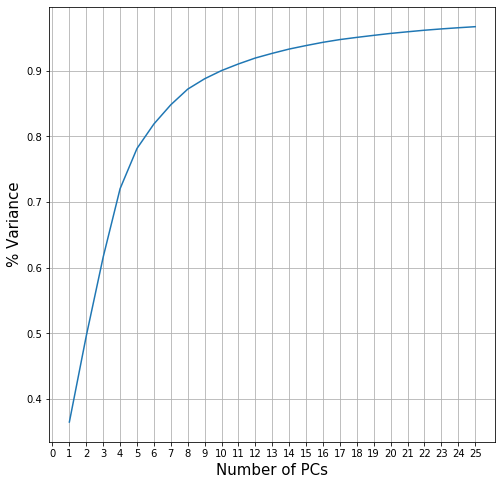

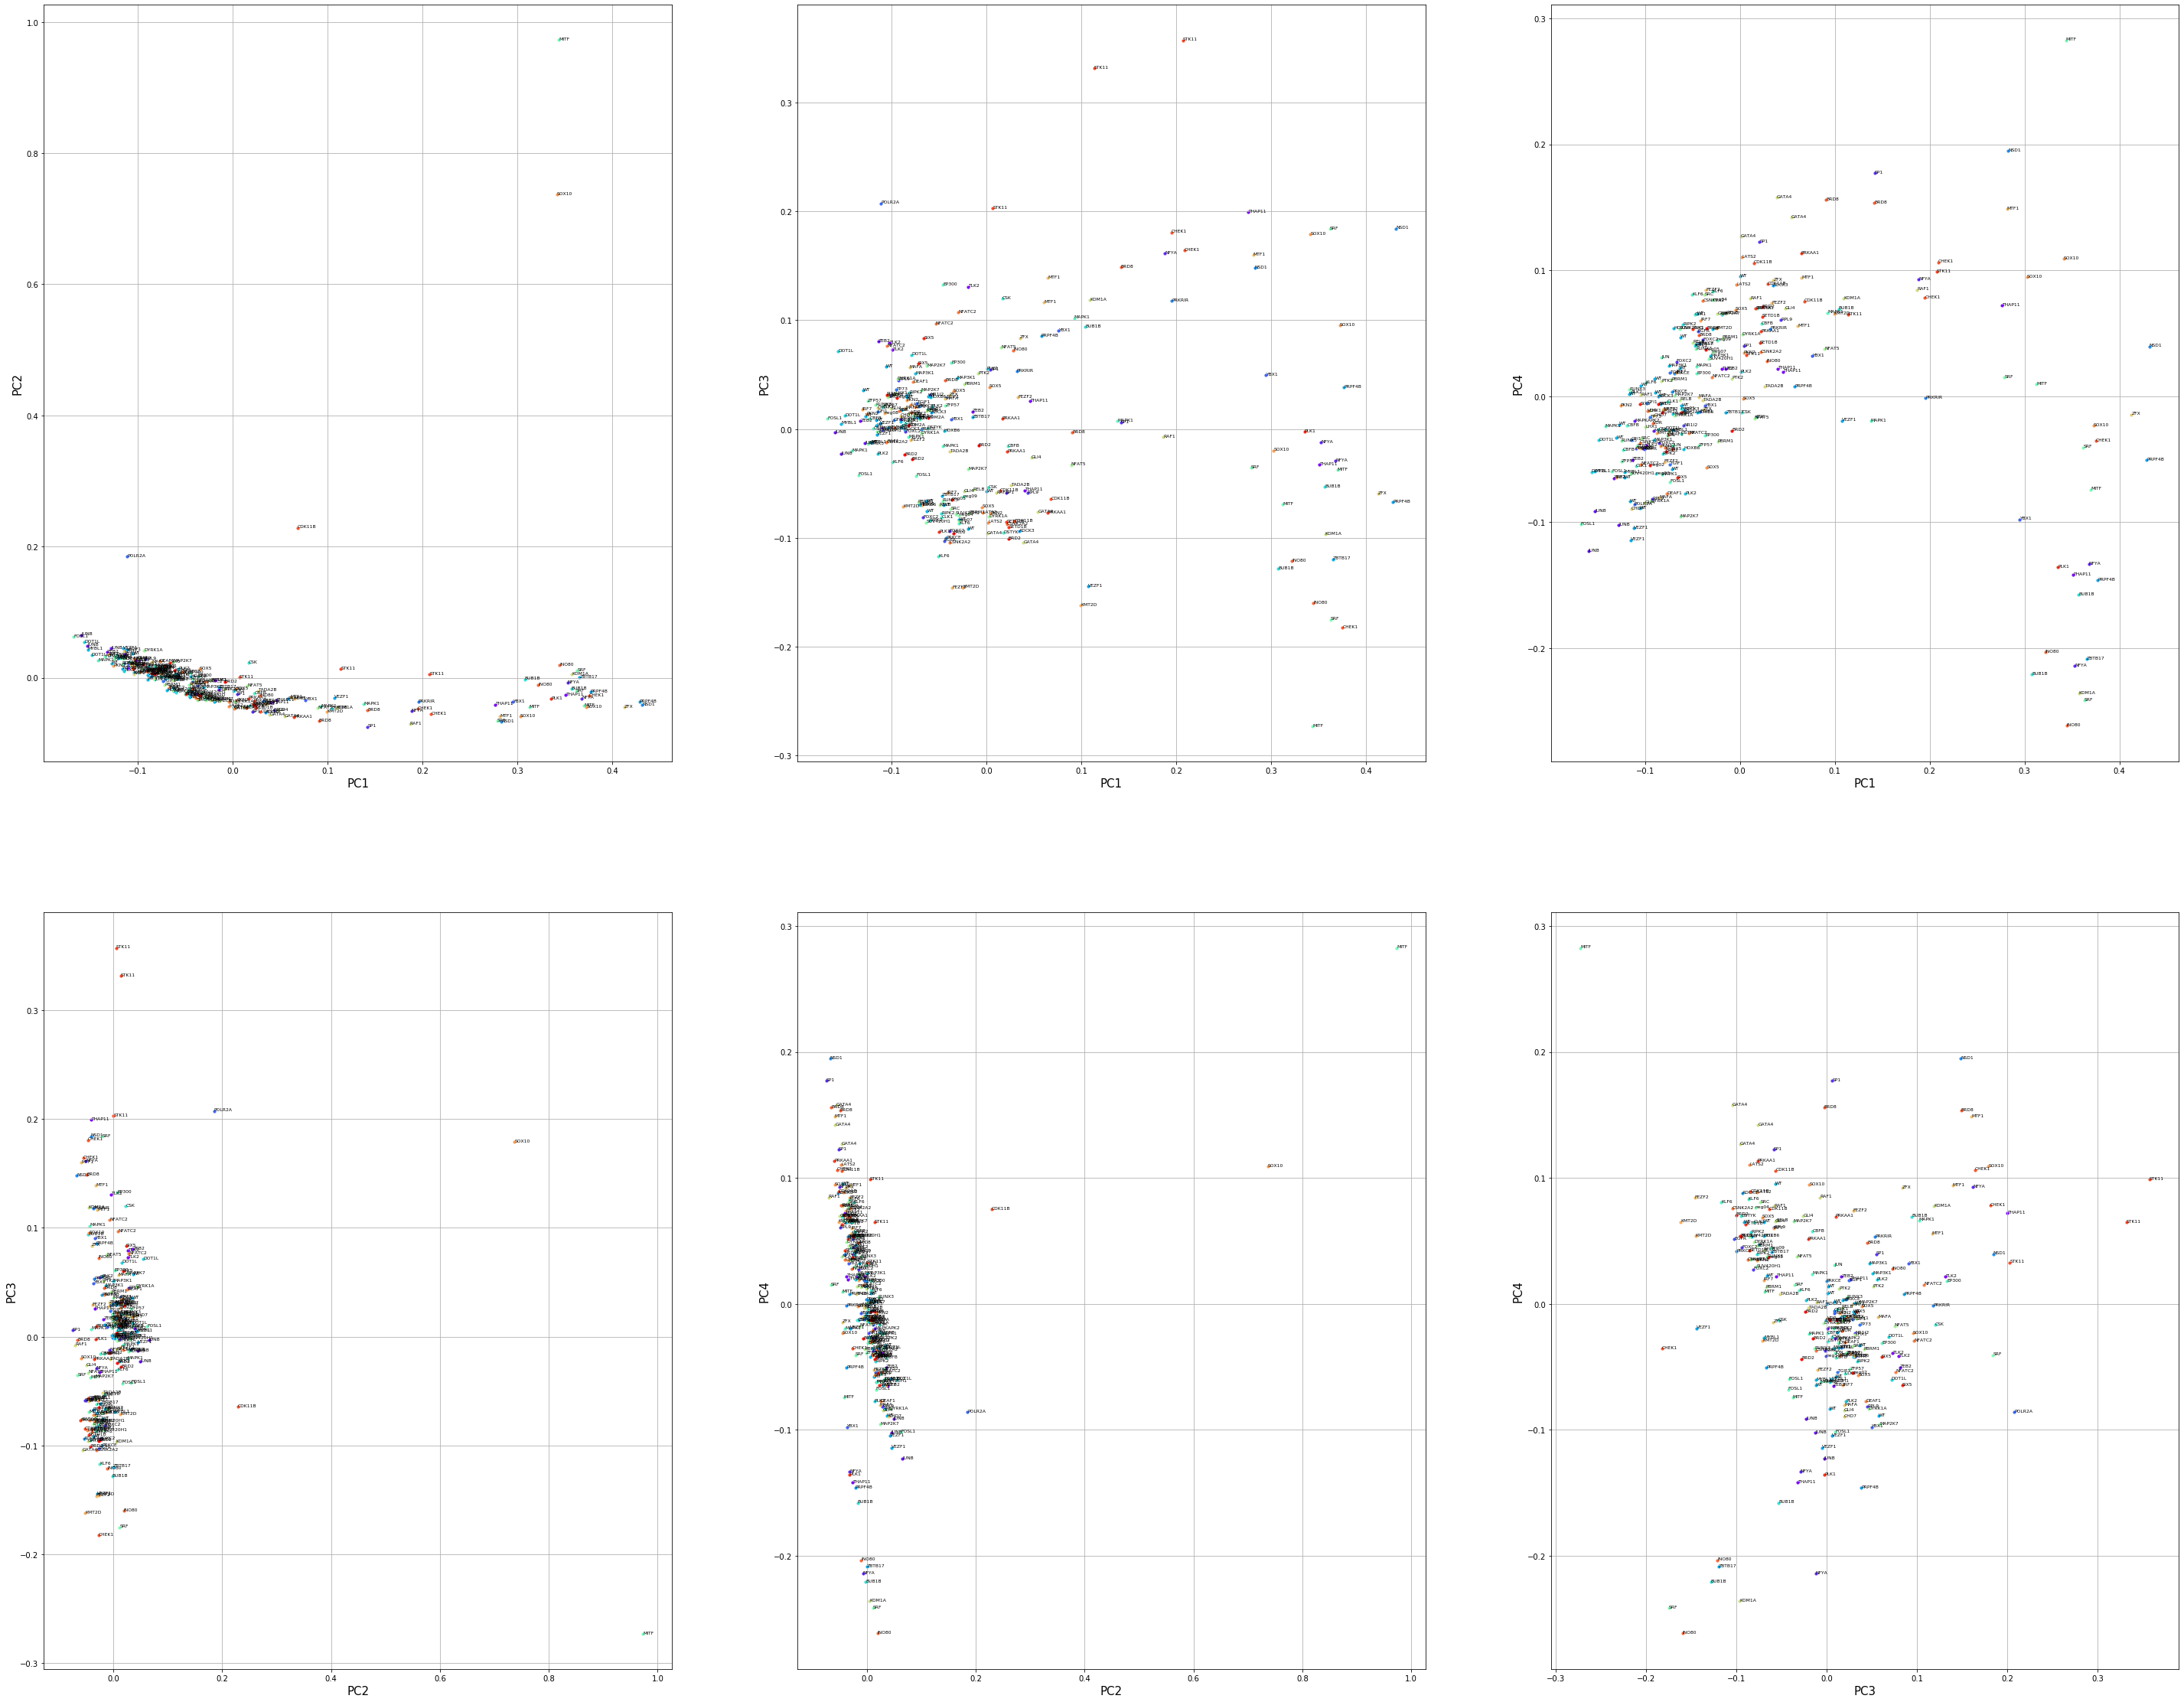

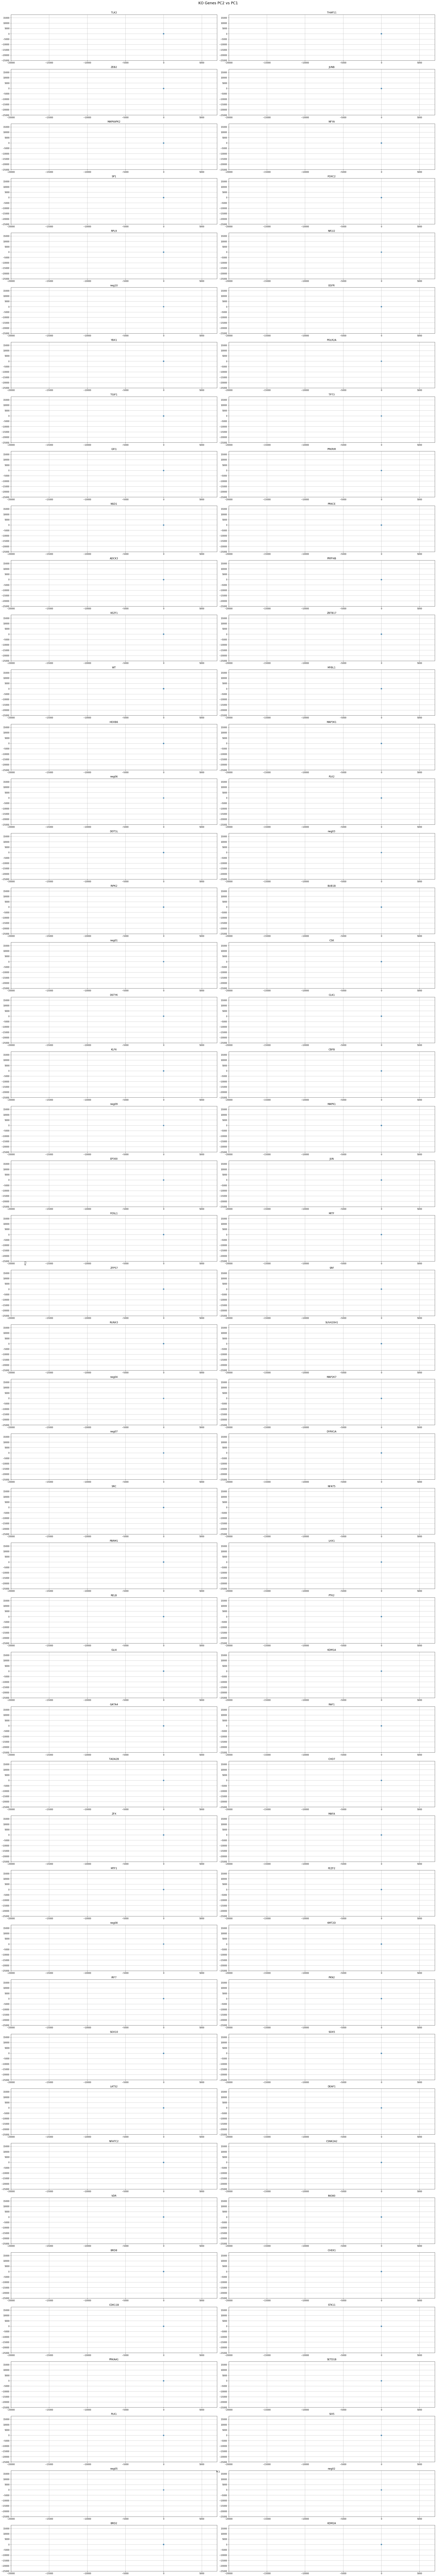

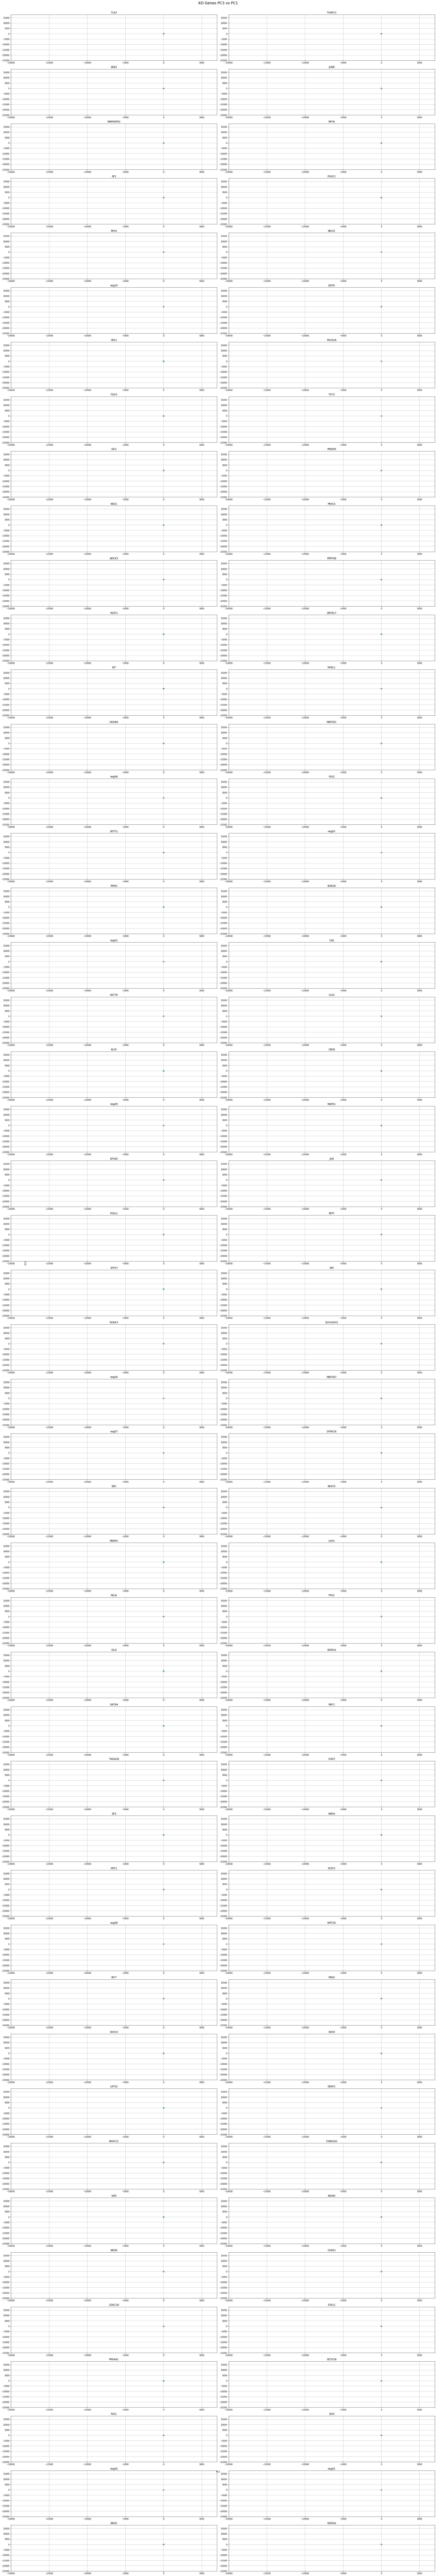

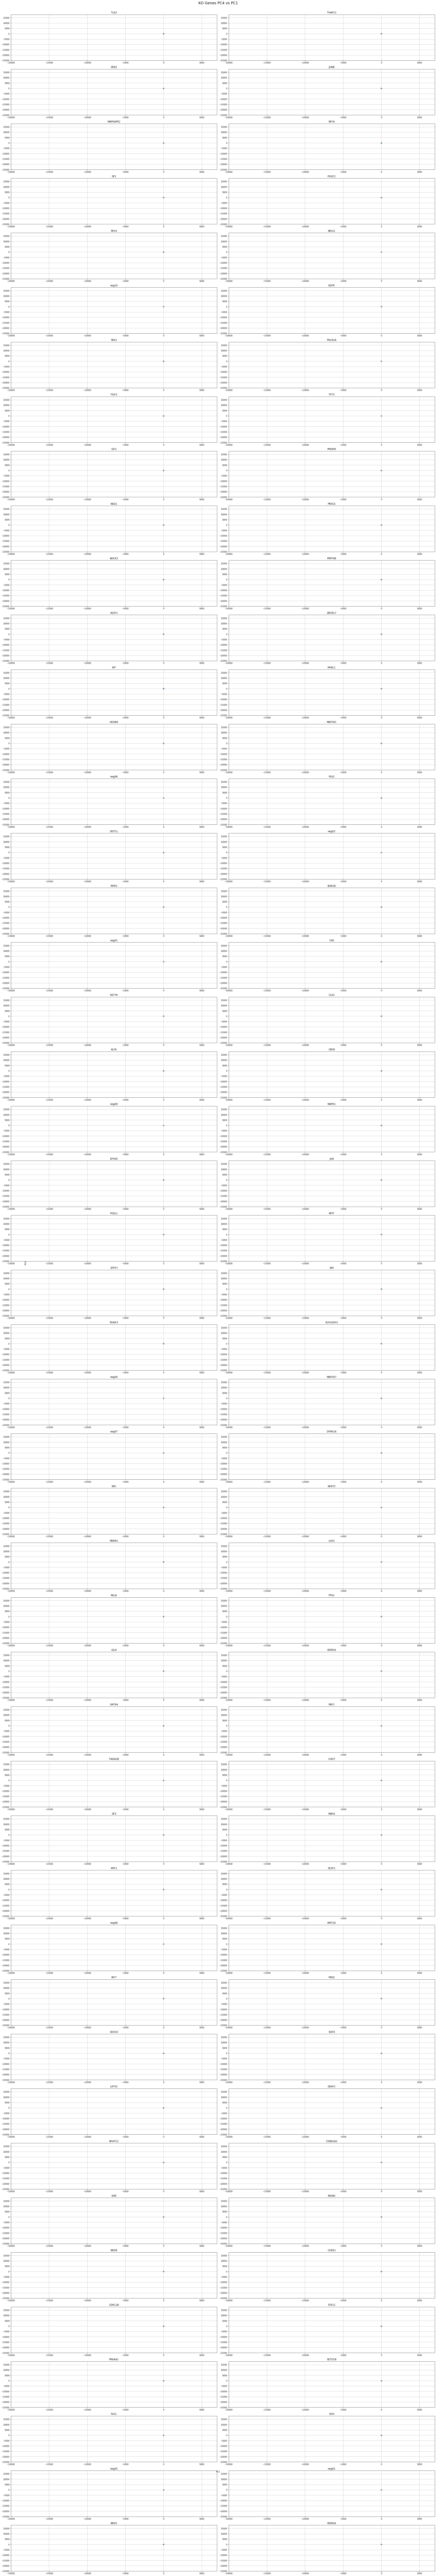

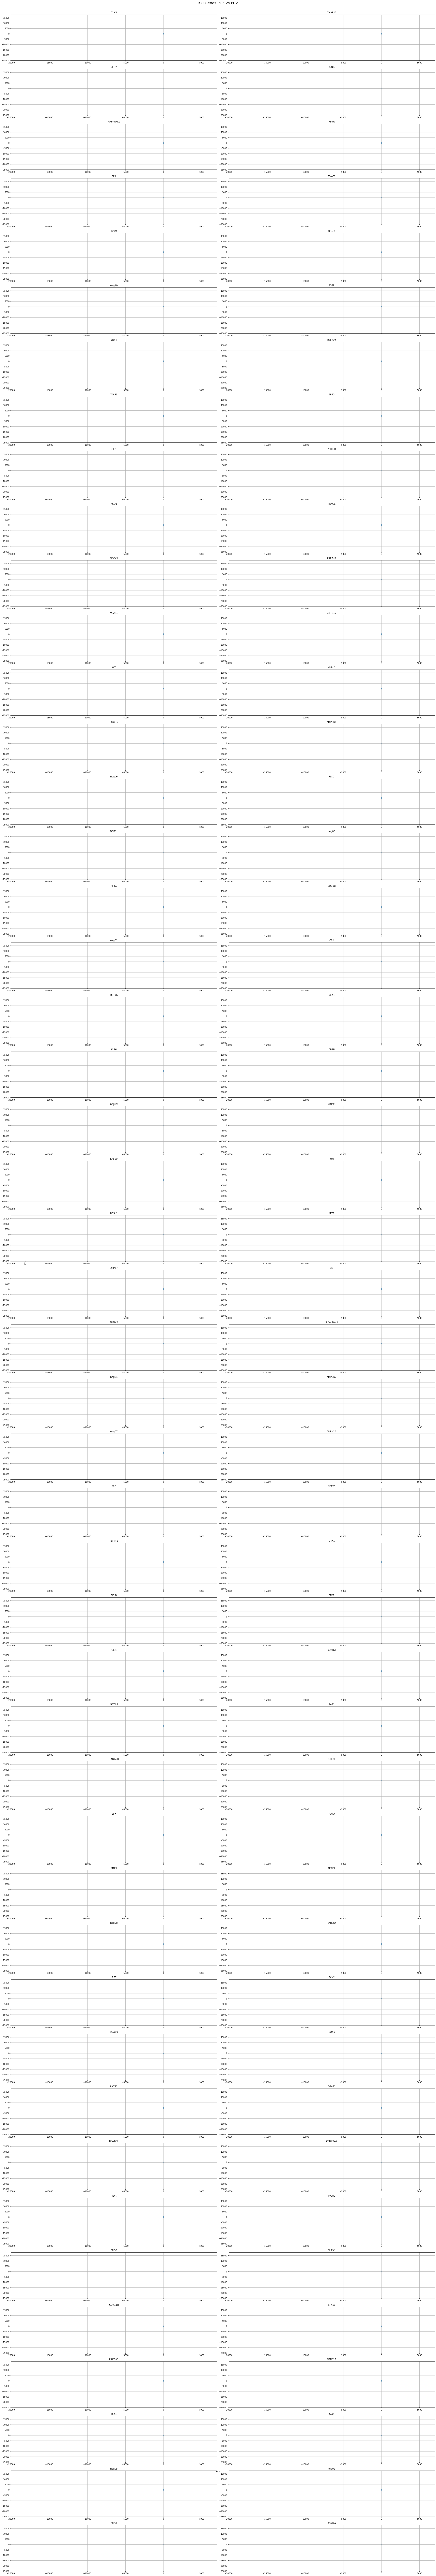

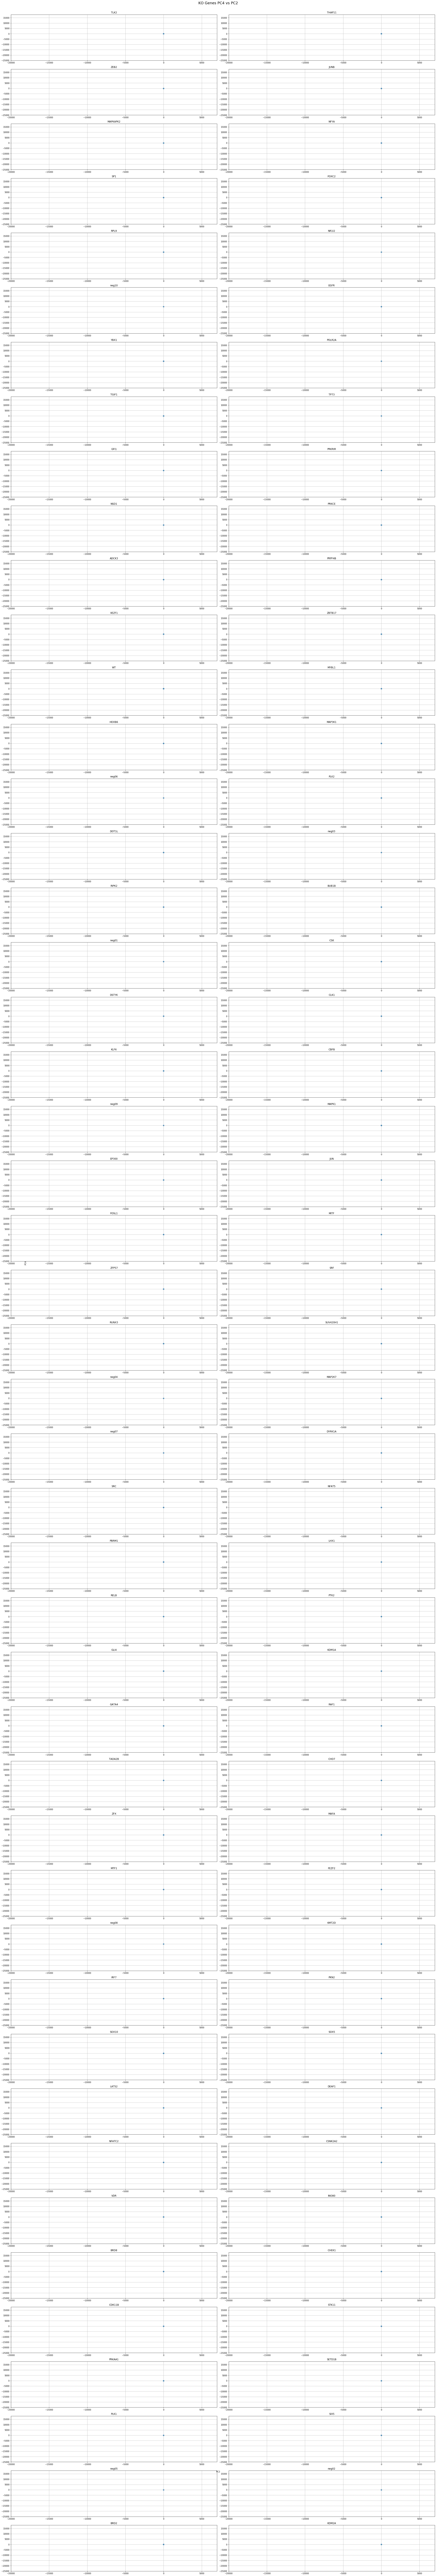

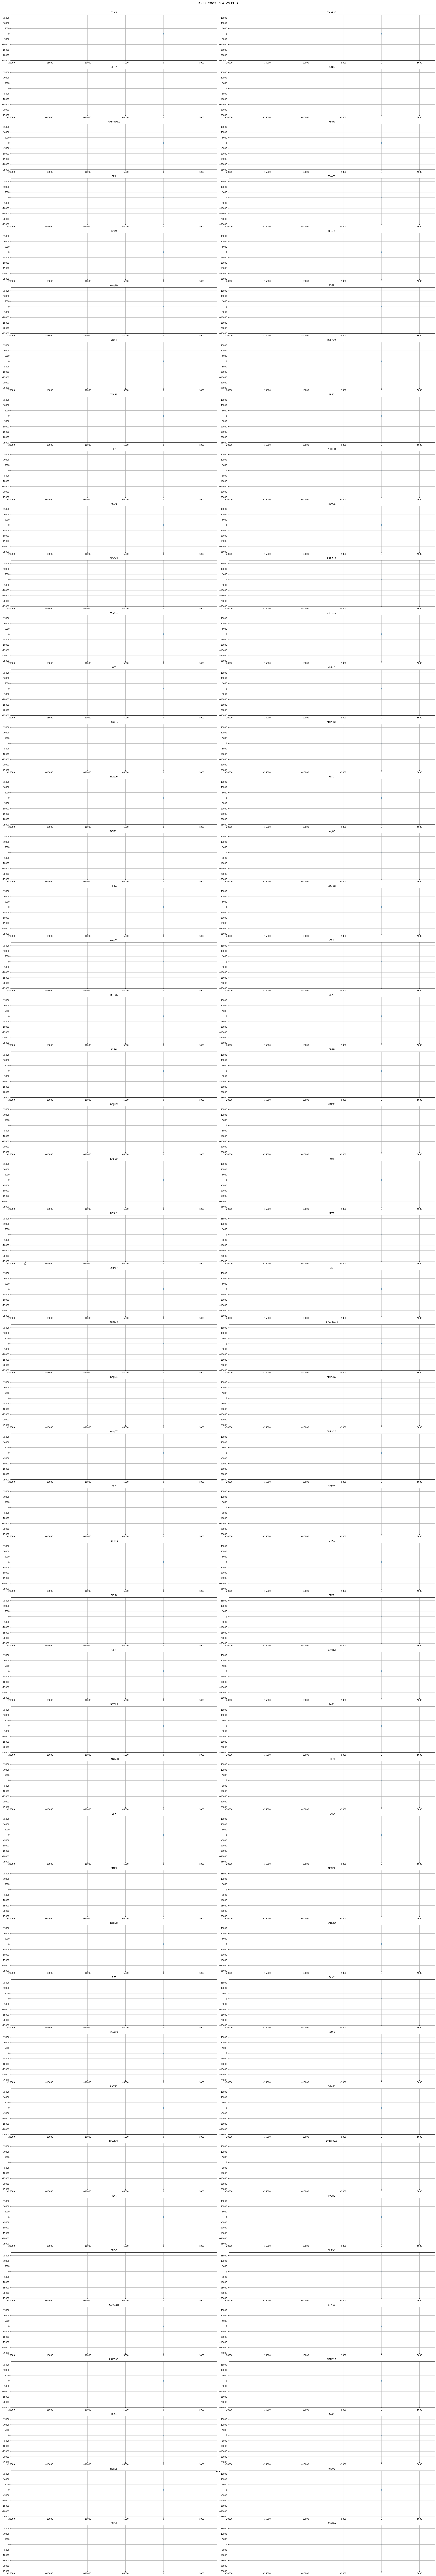

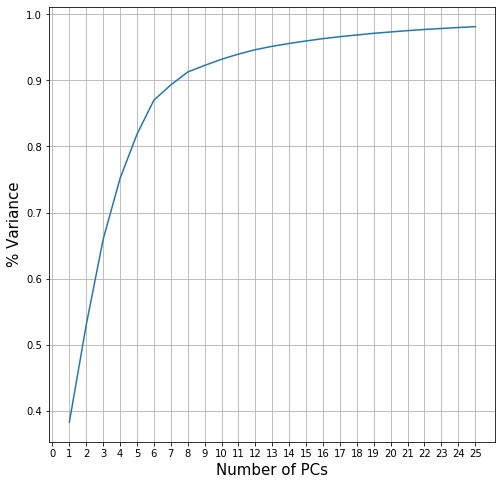

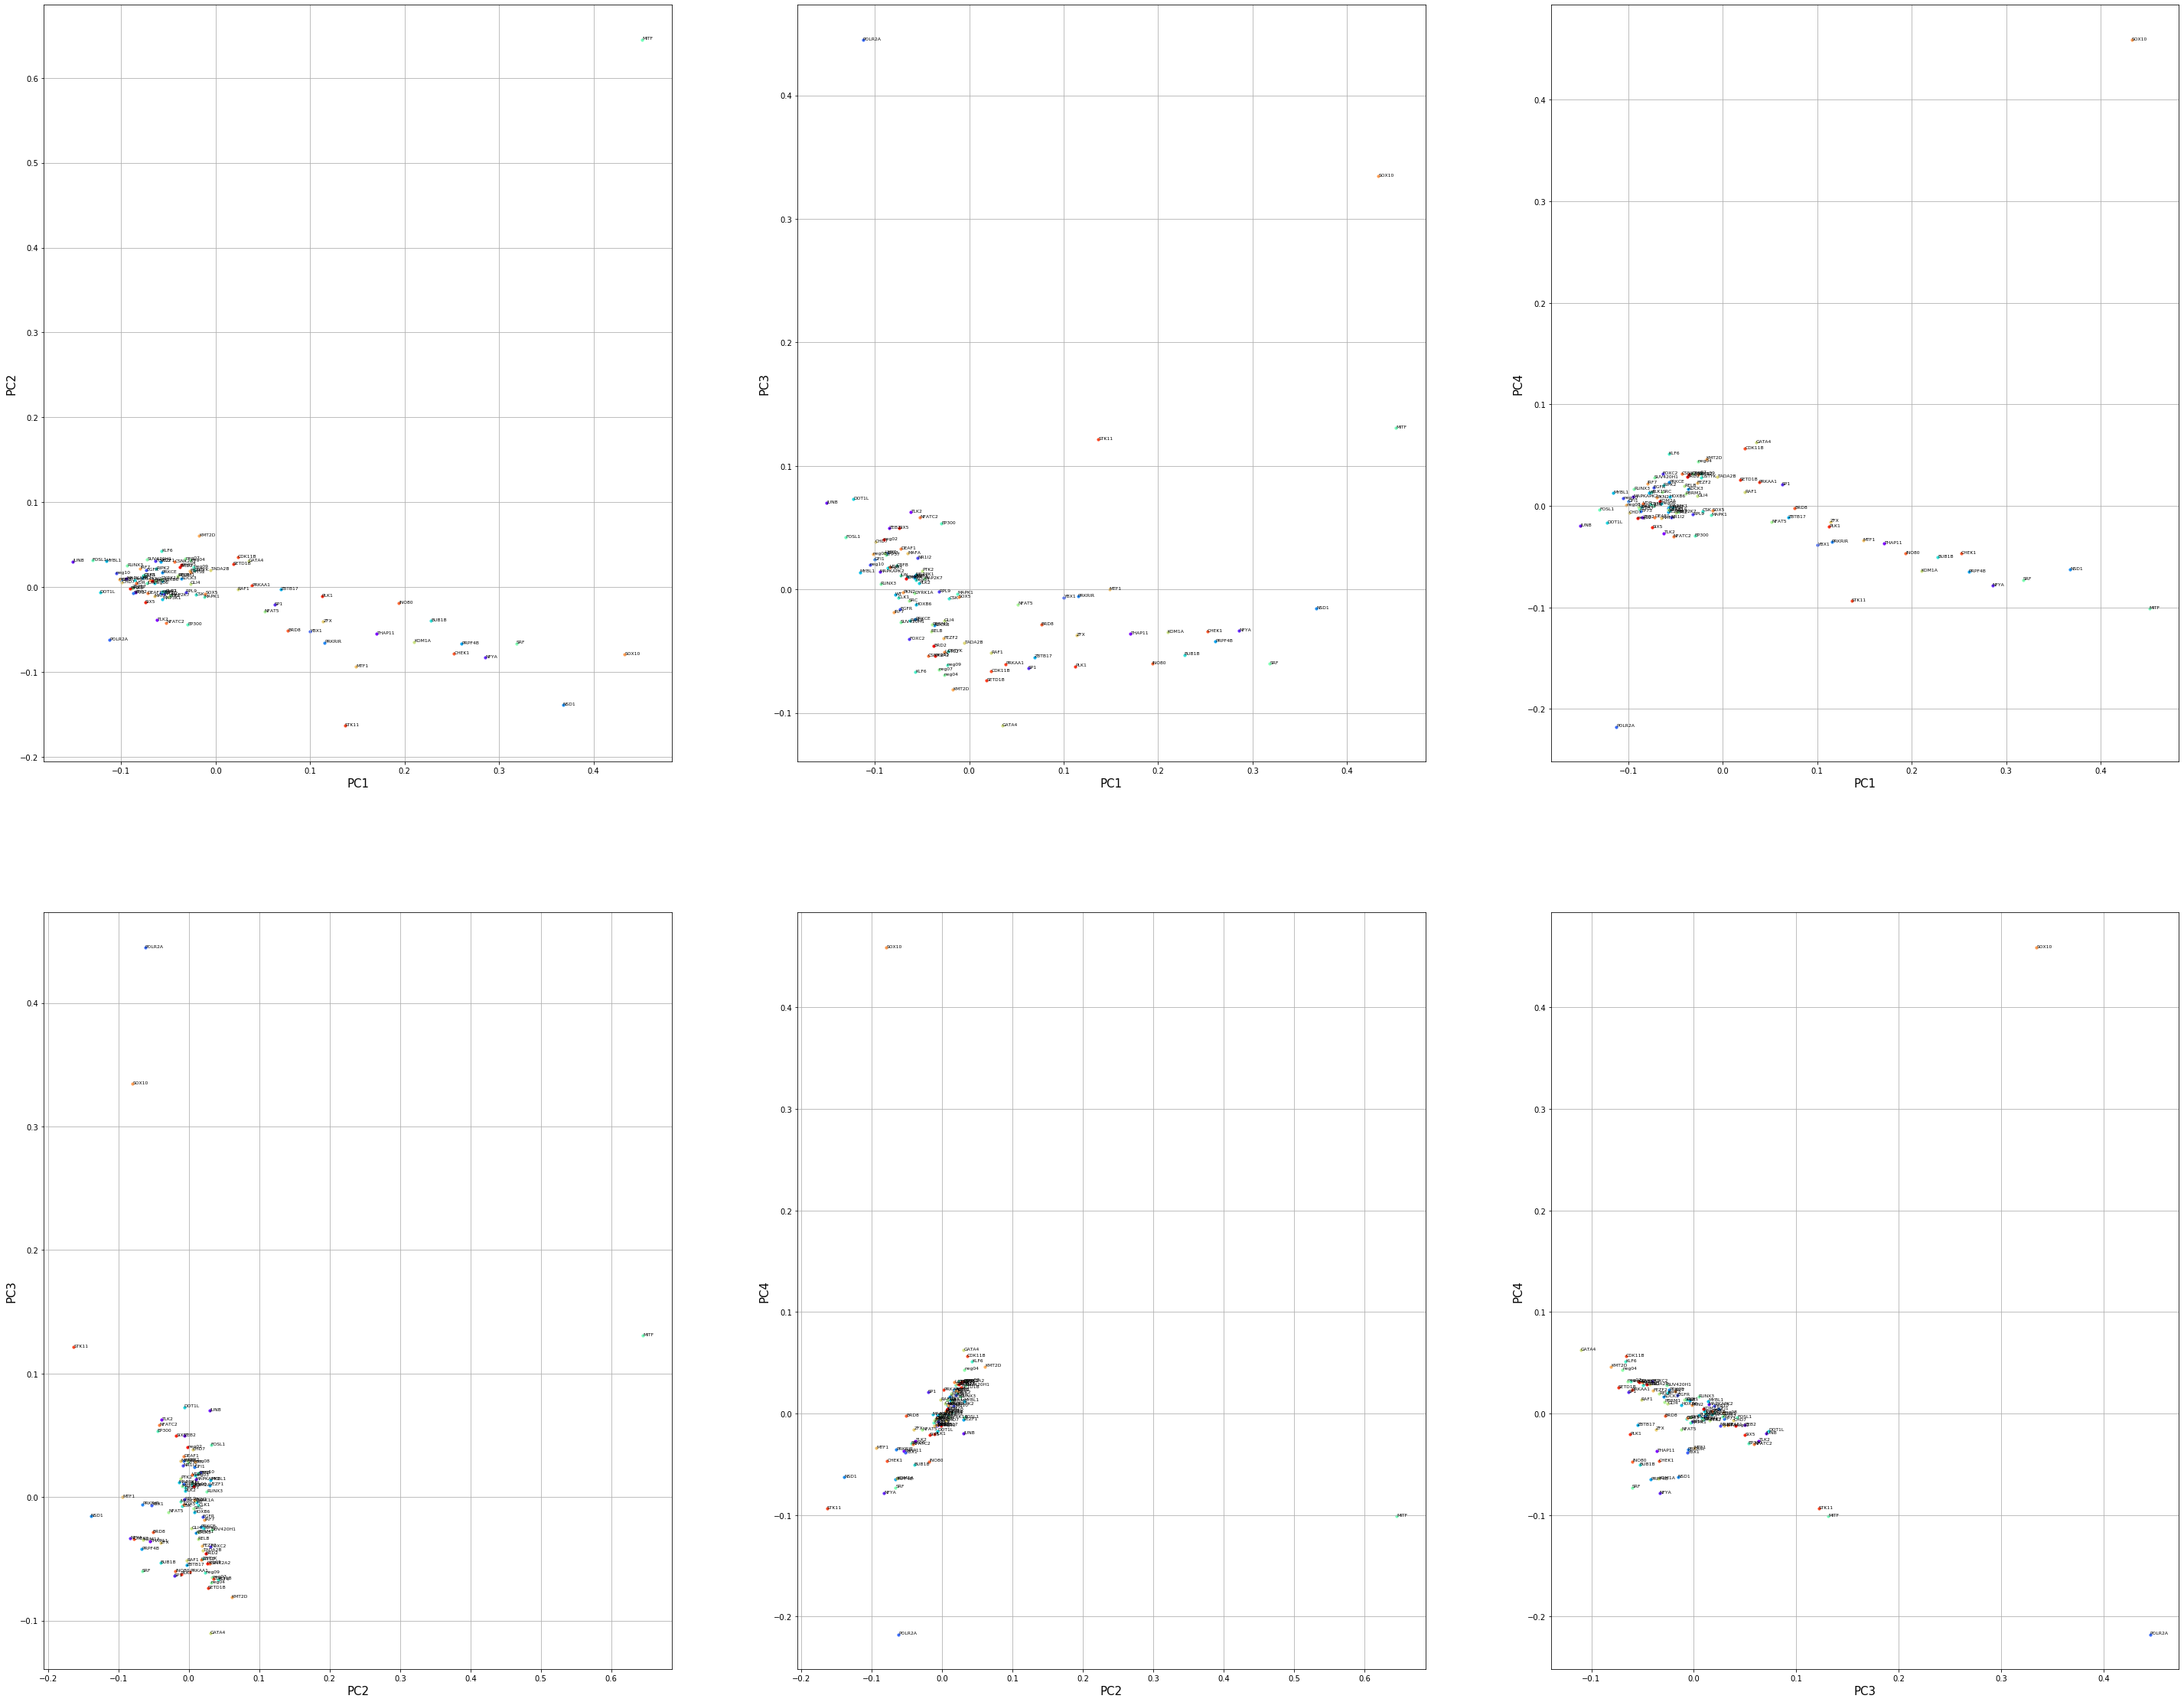

In [42]:
# %load PCA.py
""" Performs PCA analysis on RNAseq knockout data using functions from PCA_helpers.py"""
from PCA_helpers import performPCA, r2x, KOdataframe, plottingPCs, plottingPCreplicates
from importData import importRNAseqKO

data = importRNAseqKO()
# Analyze data with replicates
pca_list = performPCA(data.T, 25)
r2x(25, pca_list[0], "./replicates_r2x.png")
KO_list = KOdataframe(data, pca_list[1])
plottingPCs(KO_list, "./replicates_PCA.png")
plottingPCreplicates(KO_list, 1, 2)
plottingPCreplicates(KO_list, 1, 3)
plottingPCreplicates(KO_list, 1, 4)
plottingPCreplicates(KO_list, 2, 3)
plottingPCreplicates(KO_list, 2, 4)
plottingPCreplicates(KO_list, 3, 4)

# Analyze data with replicates averaged together
data_combined = data.groupby(by=data.columns, axis=1).mean()
pca_list2 = performPCA(data_combined.T, 25)
r2x(25, pca_list2[0], "./combined_r2x.png")
KO_list2 = KOdataframe(data_combined, pca_list2[1])
plottingPCs(KO_list2, "./combined_PCA.png")
